<a href="https://colab.research.google.com/github/danielee3/ProjectWX/blob/main/How_Cold_Is_It_Tomorrow%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from datetime import datetime, timedelta

In [156]:
ithaca = pd.read_csv('/content/gdrive/MyDrive/Weather ML Project/ITH_temp_Apr2011_Mar2021.csv')

station: three or four character site identifier

valid: timestamp of the observation

tmpf: Air Temperature in Fahrenheit, typically @ 2 meters

In [157]:
print(ithaca.shape)

(586172, 3)


In [158]:
is_METAR = ithaca['valid'].str.contains("56")
is_leap_year = ithaca['valid'].str.contains("02-29")
temp_missing = ithaca['tmpf'].str.contains("M")

In [159]:
ithaca = ithaca[is_METAR & (is_leap_year==False) & (temp_missing==False)]

In [160]:
print(ithaca.shape)

(85287, 3)


In [161]:
time_stamp = pd.to_datetime(ithaca['valid'])
temp_series = ithaca['tmpf'].astype(float)

In [162]:
time_stamp.head()

1   2011-04-01 00:56:00
2   2011-04-01 01:56:00
3   2011-04-01 02:56:00
4   2011-04-01 03:56:00
6   2011-04-01 04:56:00
Name: valid, dtype: datetime64[ns]

In [163]:
temp_series.head()

1    33.98
2    33.98
3    32.90
4    32.90
6    32.90
Name: tmpf, dtype: float64

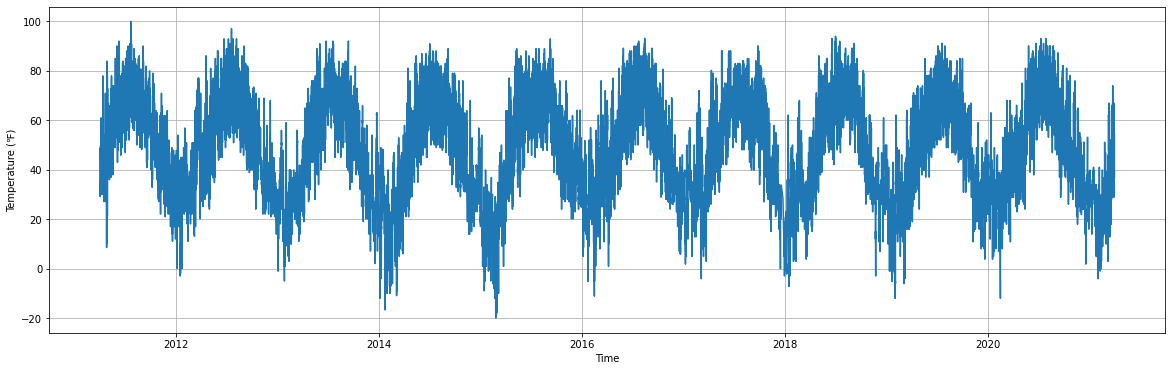

In [183]:
plt.figure(figsize=(20, 6))
plt.plot(time_stamp, temp_series)
plt.xlabel("Time")
plt.ylabel("Temperature (℉)")
plt.grid(True)

In [244]:
#Average Temperature per day
hour_diff = 15

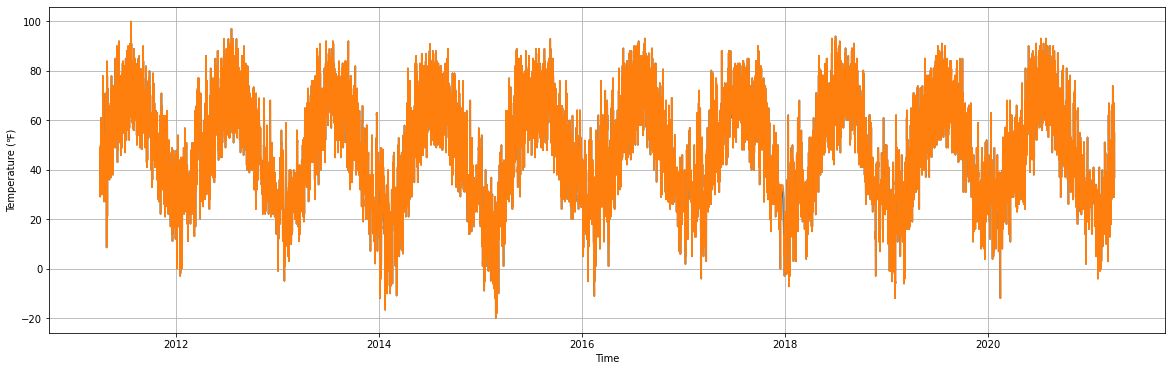

In [229]:
plt.figure(figsize=(20, 6))
plt.plot(time_stamp[hour_diff:], temp_series[hour_diff:])
plt.plot(time_stamp[hour_diff:], temp_series[:-hour_diff])
plt.xlabel("Time")
plt.ylabel("Temperature (℉)")
plt.grid(True)

In [245]:
print(keras.metrics.mean_squared_error(temp_series[hour_diff:], temp_series[:-hour_diff]).numpy())
print(keras.metrics.mean_absolute_error(temp_series[hour_diff:], temp_series[:-hour_diff]).numpy())

143.55248994746225
9.56280678300028


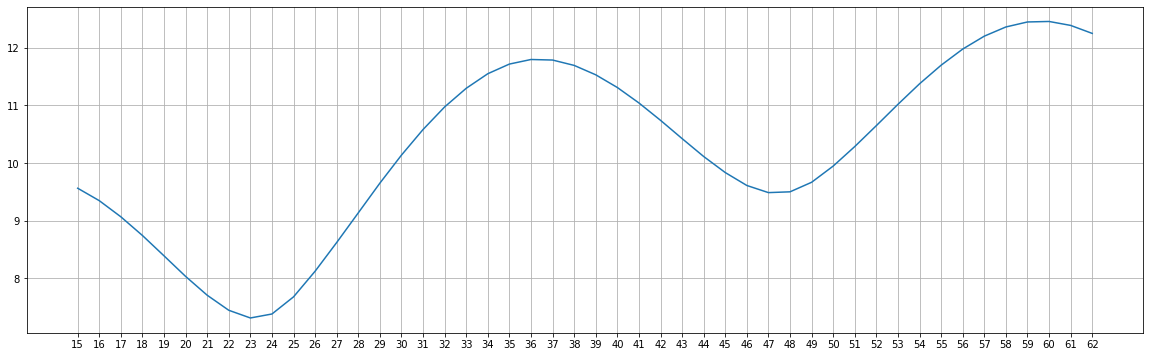

In [249]:
x = []
y = []
for i in range(48):
  x.append(i+15)
  diff = hour_diff
  diff += i
  val =  keras.metrics.mean_absolute_error(temp_series[diff:], temp_series[:-diff]).numpy()
  y.append(val)
plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.xticks(np.arange(15, 63))
plt.grid(True)